In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import utils
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set_style("whitegrid")
sns.set_palette("bright")

MODIS_DATAFILE_DATE = "2016-04-20"
LANDSAT_DATAFILE_DATE = "2016-04-13"

REL_PATH = "../"
CIMIS_DATAFILE = REL_PATH + "data/CIMIS/20160413-CIMIS-TWT-daily-2001-2016.csv"
WESTPOND_DATAFILE = REL_PATH + "data/WP_2012195to2015126_L3.mat"
WESTPOND_REFL_VEG_IDX = REL_PATH + "data/MODIS/{0}-US-Tw1-MOD13Q1.csv".format(MODIS_DATAFILE_DATE)
WESTPOND_REFL_VEG_IDX_8_DAY = REL_PATH + "data/MODIS/{0}-US-Tw1-MCD43A4.csv".format(MODIS_DATAFILE_DATE)
WESTPOND_REFL_VEG_IDX_LANDSAT = REL_PATH + "data/LandSat/{0}-US-Tw1-LANDSAT.csv".format(LANDSAT_DATAFILE_DATE)
WESTPOND_LST_EM = REL_PATH + "data/MODIS/{0}-US-Tw1-MOD11A2.csv".format(MODIS_DATAFILE_DATE)
MAYBERRY_DATAFILE = REL_PATH + "data/MB_2010287to2016055_L3.mat"
MAYBERRY_REFL_VEG_IDX = REL_PATH + "data/MODIS/{0}-US-Myb-MOD13Q1.csv".format(MODIS_DATAFILE_DATE)
MAYBERRY_REFL_VEG_IDX_8_DAY = REL_PATH + "data/MODIS/{0}-US-Myb-MCD43A4.csv".format(MODIS_DATAFILE_DATE)
MAYBERRY_REFL_VEG_IDX_LANDSAT = REL_PATH + "data/LandSat/{0}-US-Myb-LANDSAT.csv".format(LANDSAT_DATAFILE_DATE)
MAYBERRY_LST_EM = REL_PATH + "data/MODIS/{0}-US-Myb-MOD11A2.csv".format(MODIS_DATAFILE_DATE)
TOWER_LWI = REL_PATH + "data/Tower-data/2016-04-14_daily_TOWER_LW.csv"

### CIMIS, w/ and w/o interpolation

In [2]:
cimis = utils.process_cimis(CIMIS_DATAFILE, interpolate_missing=False)
cimis["days_elapsed"] = utils.create_days_elapsed_series(cimis["year"], cimis["doy"])
cimis.iloc[:15]

Processing ../data/CIMIS/20160413-CIMIS-TWT-daily-2001-2016.csv...


,PET,VPD,air_temp,doy,precip,soil_temp,sw_in,wind_speed,year,days_elapsed
0,0.39,0.032864,2.975000,1,0.3,8.787500,5.0832,1.616667,2001,366
1,0.60,0.061891,3.212500,2,0.3,8.758333,6.4440,1.362500,2001,367
2,1.23,0.199224,5.279167,3,0.3,8.737500,10.0260,1.250000,2001,368
3,0.99,0.145448,4.212500,4,0.3,8.683333,8.7696,1.112500,2001,369
4,1.26,0.172839,5.208333,5,0.2,8.629167,10.0404,1.454167,2001,370
5,1.13,0.173236,5.429167,6,0.2,8.533333,9.3384,1.495833,2001,371
6,0.35,0.106440,5.333333,7,0.6,8.554167,3.9780,1.433333,2001,372
7,0.39,0.116188,9.104167,8,11.1,9.137500,3.3552,2.445833,2001,373
8,0.54,0.143064,7.895833,9,0.1,9.237500,4.5468,3.116667,2001,374
9,0.17,0.102569,8.125000,10,13.1,9.258333,1.1232,6.529167,2001,375


In [3]:
cimis_interpolated = utils.process_cimis(CIMIS_DATAFILE, interpolate_missing=True)
cimis_interpolated["days_elapsed"] = utils.create_days_elapsed_series(cimis_interpolated["year"], cimis_interpolated["doy"])
cimis_interpolated.iloc[:15]

Processing ../data/CIMIS/20160413-CIMIS-TWT-daily-2001-2016.csv...


,PET,VPD,air_temp,doy,precip,soil_temp,sw_in,wind_speed,year,days_elapsed
0,0.39,0.032864,2.975000,1,0.3,8.787500,5.0832,1.616667,2001,366
1,0.60,0.061891,3.212500,2,0.3,8.758333,6.4440,1.362500,2001,367
2,1.23,0.199224,5.279167,3,0.3,8.737500,10.0260,1.250000,2001,368
3,0.99,0.145448,4.212500,4,0.3,8.683333,8.7696,1.112500,2001,369
4,1.26,0.172839,5.208333,5,0.2,8.629167,10.0404,1.454167,2001,370
5,1.13,0.173236,5.429167,6,0.2,8.533333,9.3384,1.495833,2001,371
6,0.35,0.106440,5.333333,7,0.6,8.554167,3.9780,1.433333,2001,372
7,0.39,0.116188,9.104167,8,11.1,9.137500,3.3552,2.445833,2001,373
8,0.54,0.143064,7.895833,9,0.1,9.237500,4.5468,3.116667,2001,374
9,0.17,0.102569,8.125000,10,13.1,9.258333,1.1232,6.529167,2001,375


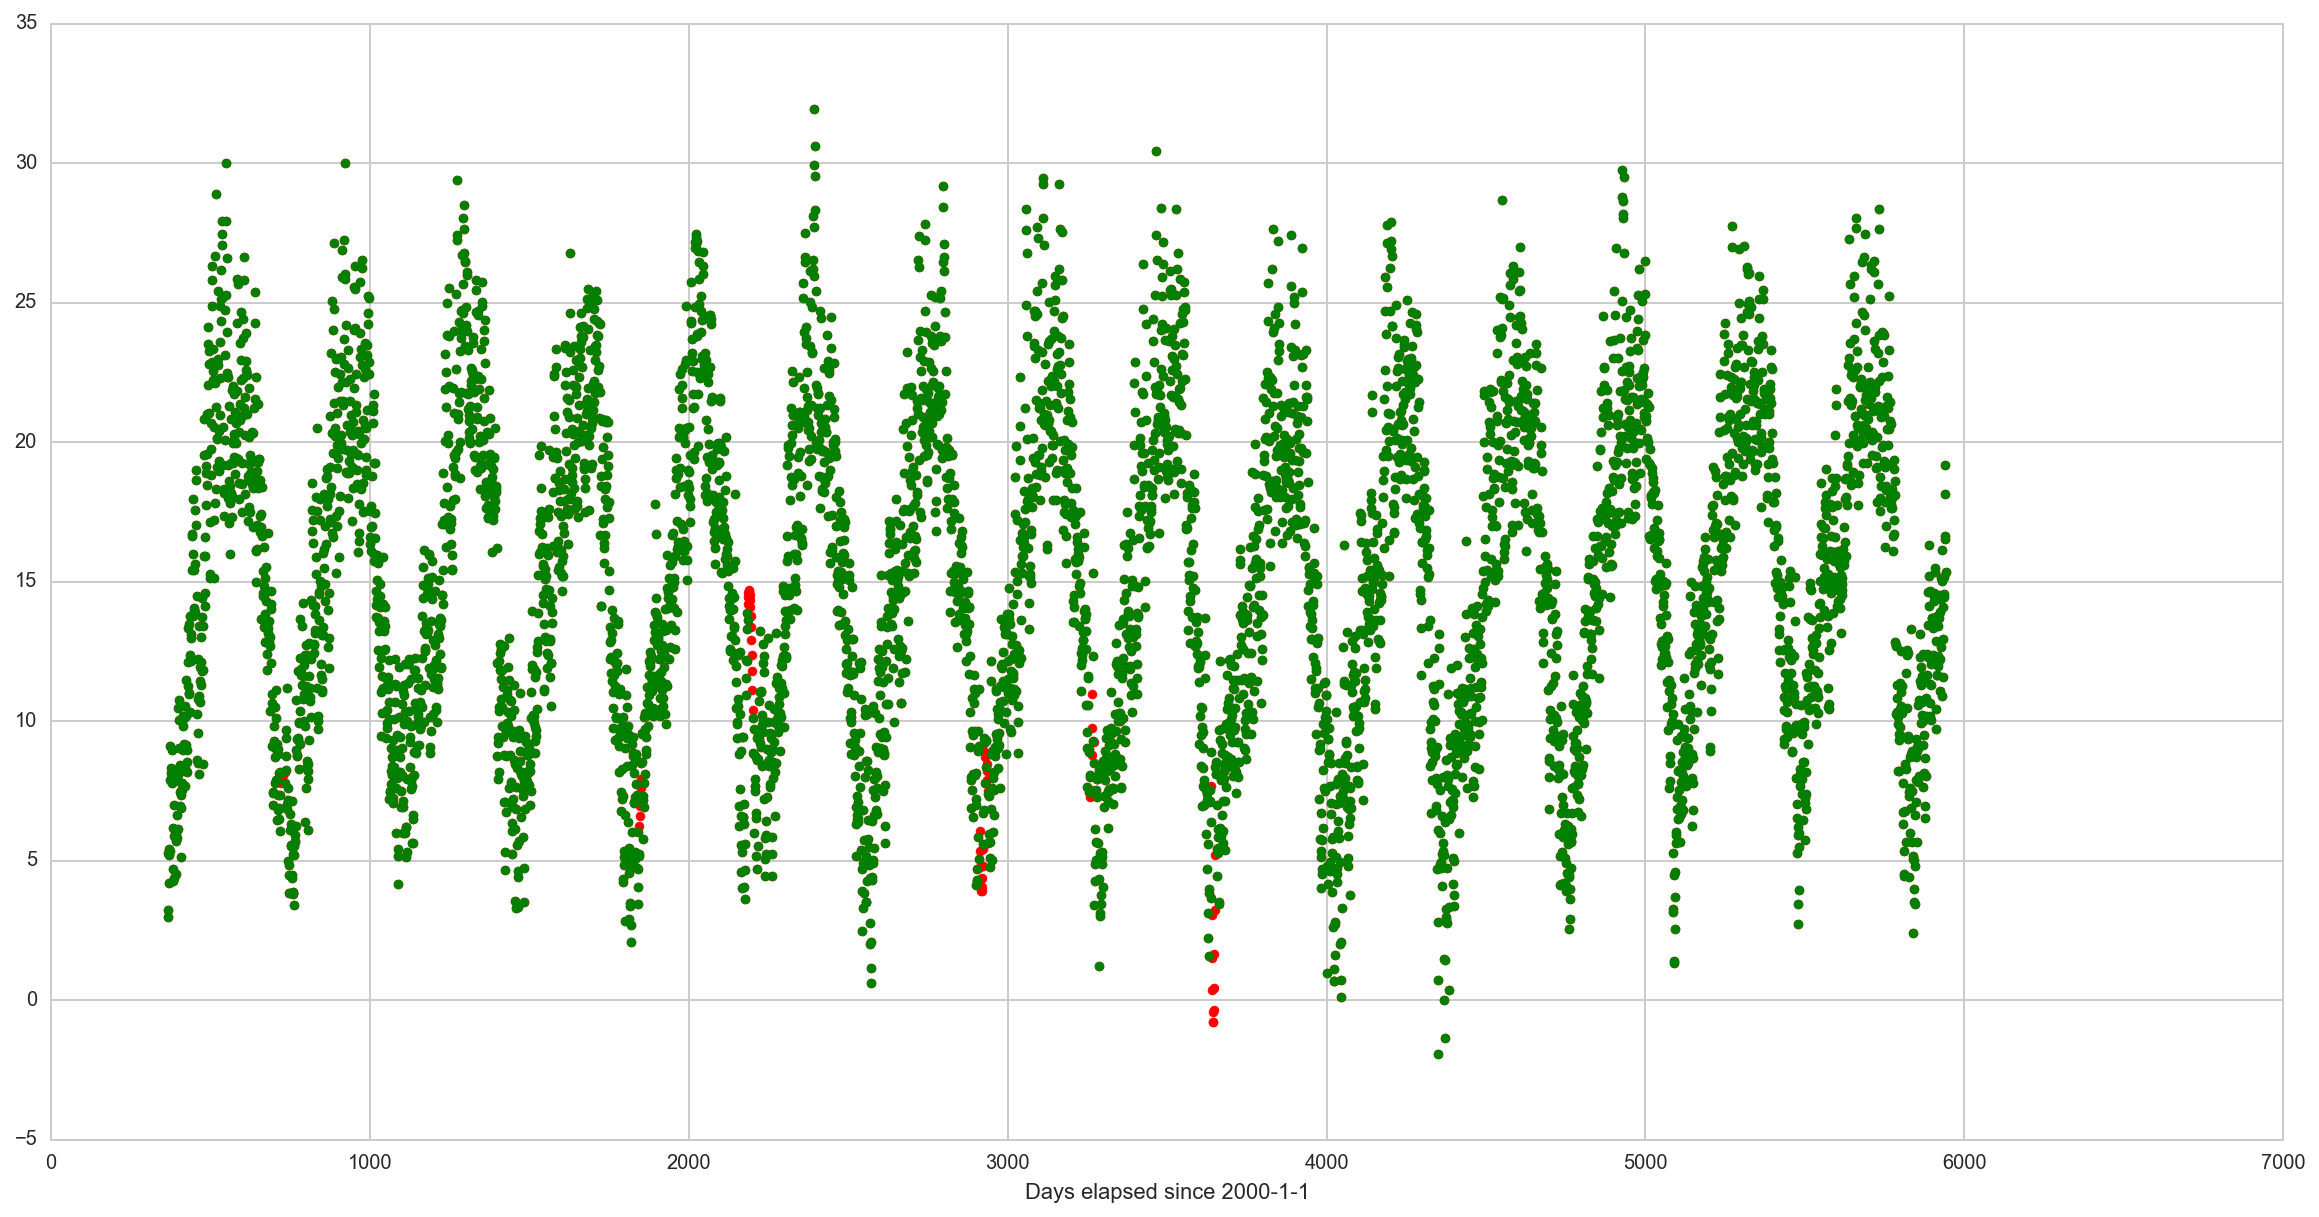

In [4]:
plt.scatter(cimis_interpolated["days_elapsed"], cimis_interpolated["air_temp"], color="red")
plt.scatter(cimis["days_elapsed"], cimis["air_temp"], color="green")
plt.xlabel("Days elapsed since 2000-1-1")
plt.show()

### MODIS 16 DAY - Surface Reflectance and Vegetation Indices

In [5]:
df_srvi = utils.process_modis_reflectance_veg_index(WESTPOND_REFL_VEG_IDX, prefix="wp", interpolate_missing=False).reset_index(drop=True)
df_srvi["days_elapsed"] = utils.create_days_elapsed_series(df_srvi["year"], df_srvi["doy"])
df_srvi.head()

Processing ../data/MODIS/2016-04-20-US-Tw1-MOD13Q1.csv...


,doy,wp_evi,wp_lswi2,wp_ndvi,year,days_elapsed
0,15,0.1796,0.075945,0.4415,2001,380
1,17,0.1619,-0.053281,0.3949,2001,382
2,38,0.1828,0.096064,0.4243,2001,403
3,58,0.2479,0.090129,0.5155,2001,423
4,72,0.2956,0.049877,0.5489,2001,437


In [6]:
df_srvi_interpolated = utils.process_modis_reflectance_veg_index(WESTPOND_REFL_VEG_IDX, prefix="wp", interpolate_missing=True, method='linear', order=1)
df_srvi_interpolated["days_elapsed"] = utils.create_days_elapsed_series(df_srvi_interpolated["year"], df_srvi_interpolated["doy"])
df_srvi_interpolated.head()

Processing ../data/MODIS/2016-04-20-US-Tw1-MOD13Q1.csv...


,doy,wp_evi,wp_lswi2,wp_ndvi,year,days_elapsed
0,15,0.179600,0.075945,0.4415,2001,380
1,16,0.170750,0.011332,0.4182,2001,381
2,17,0.161900,-0.053281,0.3949,2001,382
3,18,0.162895,-0.046170,0.3963,2001,383
4,19,0.163890,-0.039058,0.3977,2001,384


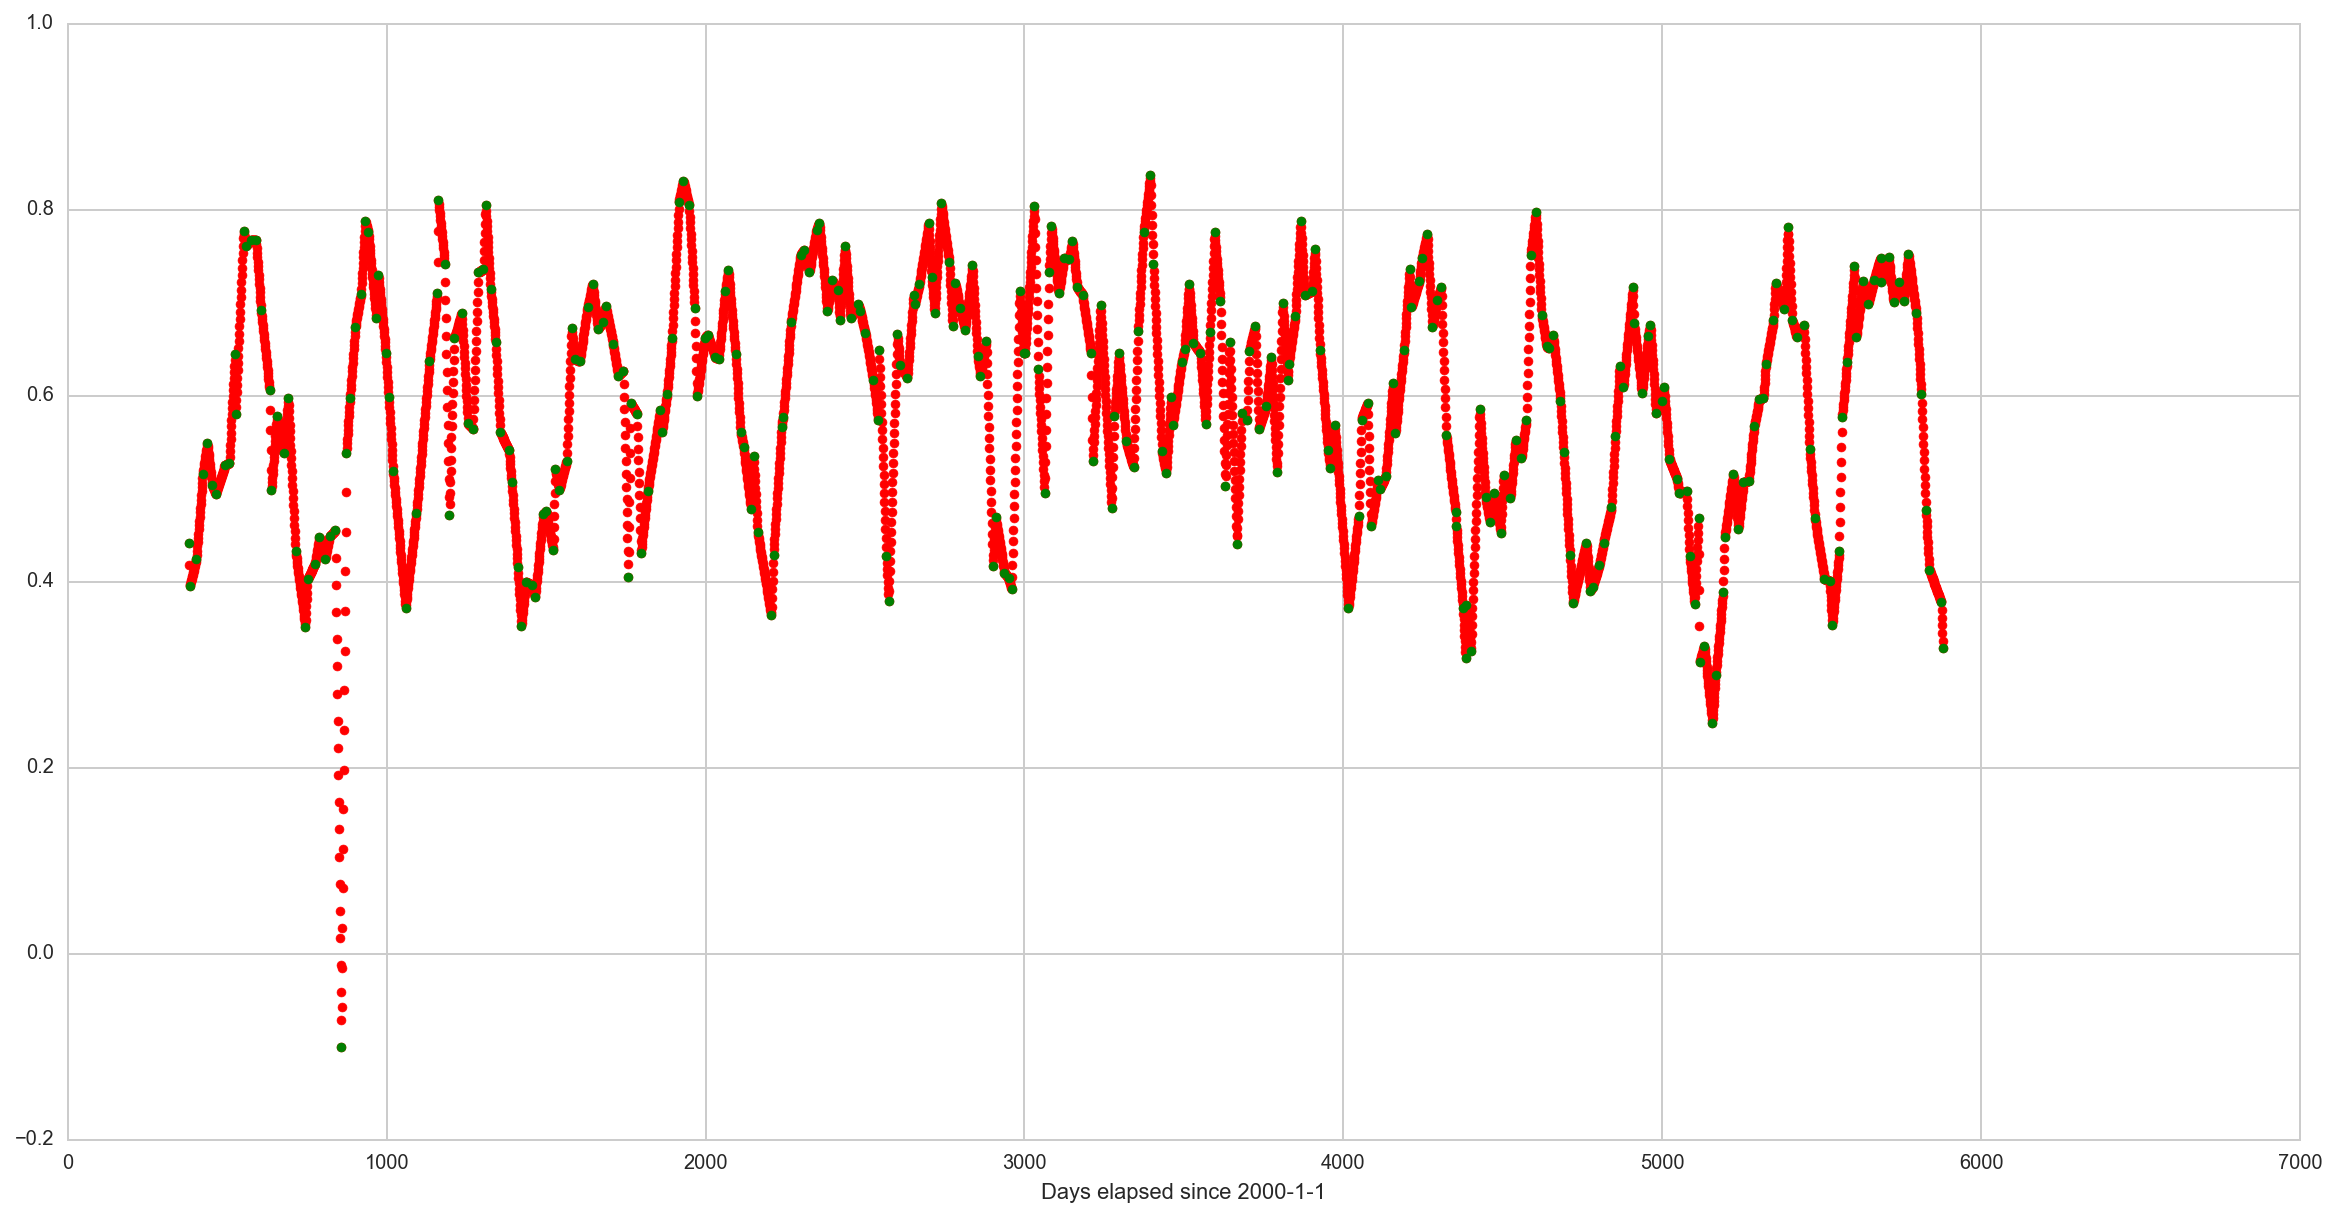

In [7]:
plt.scatter(df_srvi_interpolated["days_elapsed"], df_srvi_interpolated["wp_ndvi"], color="red")
plt.scatter(df_srvi["days_elapsed"], df_srvi["wp_ndvi"], color="green")
plt.xlabel("Days elapsed since 2000-1-1")
plt.show()

### MODIS 8 DAY SURFACE REFLECTION AND VEGETATION INDEX MCD43A4

In [8]:
df_srvi = utils.process_modis_reflectance_veg_index(WESTPOND_REFL_VEG_IDX_8_DAY, prefix="wp", interpolate_missing=False).reset_index(drop=True)
df_srvi["days_elapsed"] = utils.create_days_elapsed_series(df_srvi["year"], df_srvi["doy"])
df_srvi.head()

Processing ../data/MODIS/2016-04-20-US-Tw1-MCD43A4.csv...


,doy,wp_evi,wp_lswi2,wp_ndvi,year,days_elapsed
0,4,0.145047,-0.021466,0.385744,2001,369
1,12,0.147764,-0.012254,0.389760,2001,377
2,20,0.168615,0.028260,0.405305,2001,385
3,28,0.174205,0.056720,0.386731,2001,393
4,36,0.153897,-0.024670,0.376252,2001,401


In [9]:
df_srvi_interpolated = utils.process_modis_reflectance_veg_index(WESTPOND_REFL_VEG_IDX_8_DAY, prefix="wp", interpolate_missing=True, method='linear', order=1)
df_srvi_interpolated["days_elapsed"] = utils.create_days_elapsed_series(df_srvi_interpolated["year"], df_srvi_interpolated["doy"])
df_srvi_interpolated.head()

Processing ../data/MODIS/2016-04-20-US-Tw1-MCD43A4.csv...


,doy,wp_evi,wp_lswi2,wp_ndvi,year,days_elapsed
0,4,0.145047,-0.021466,0.385744,2001,369
1,5,0.145387,-0.020314,0.386246,2001,370
2,6,0.145727,-0.019163,0.386748,2001,371
3,7,0.146066,-0.018011,0.387250,2001,372
4,8,0.146406,-0.016860,0.387752,2001,373


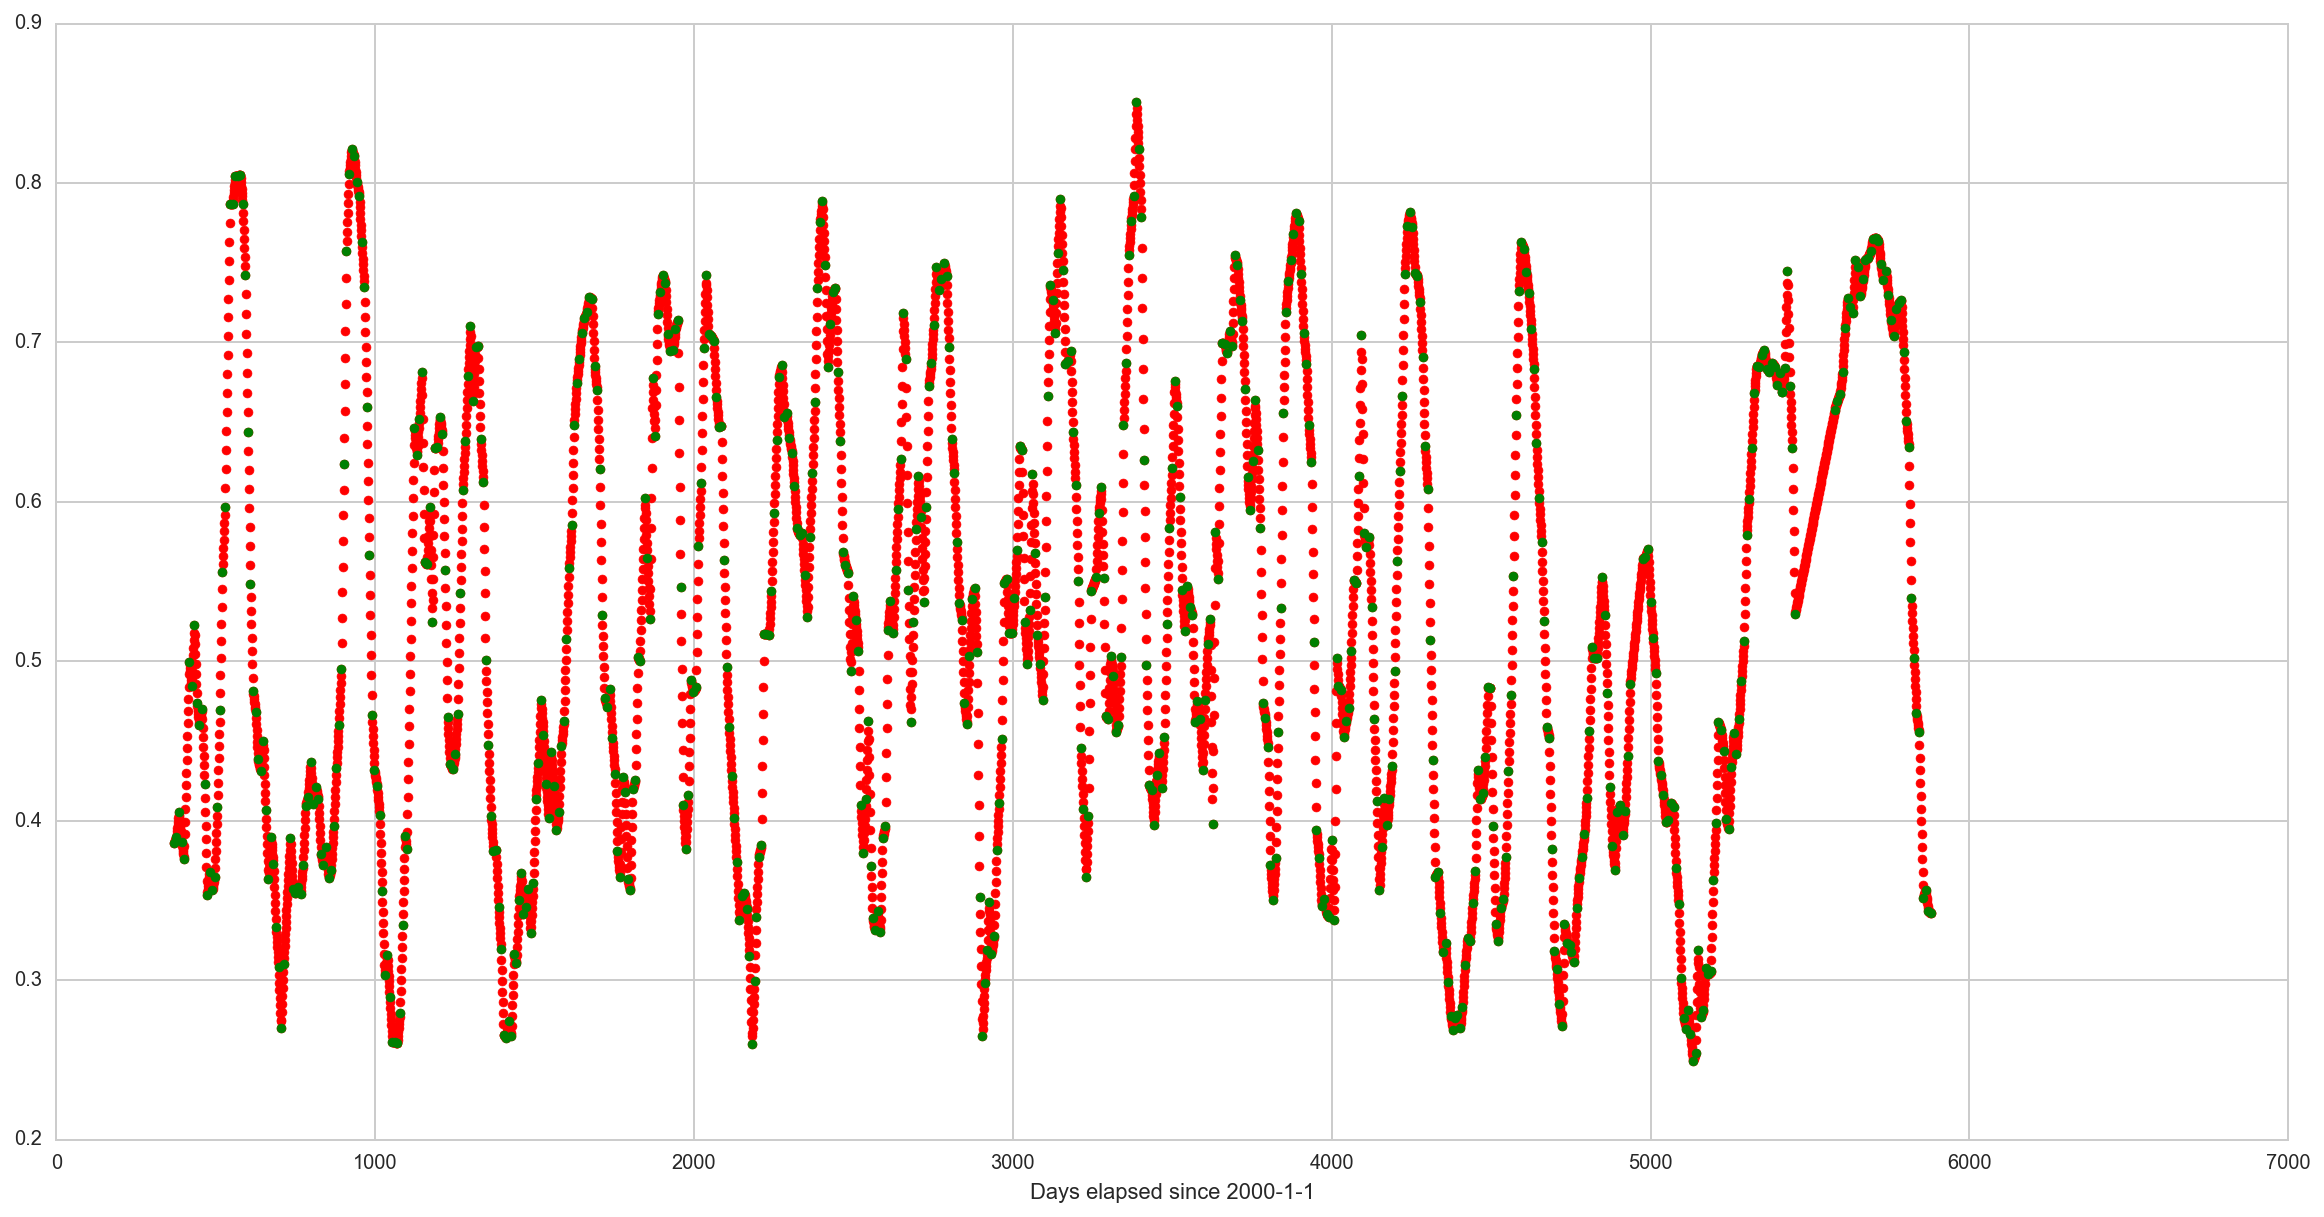

In [10]:
plt.scatter(df_srvi_interpolated["days_elapsed"], df_srvi_interpolated["wp_ndvi"], color="red")
plt.scatter(df_srvi["days_elapsed"], df_srvi["wp_ndvi"], color="green")
plt.xlabel("Days elapsed since 2000-1-1")
plt.show()

### LANDSAT SURFACE REFLECTION AND VEGETATION INDEX

In [11]:
df_srvi = utils.process_modis_reflectance_veg_index(WESTPOND_REFL_VEG_IDX_LANDSAT, prefix="wp", interpolate_missing=False).reset_index(drop=True)
df_srvi["days_elapsed"] = utils.create_days_elapsed_series(df_srvi["year"], df_srvi["doy"])
df_srvi.head()

Processing ../data/LandSat/2016-04-13-US-Tw1-LANDSAT.csv...


,doy,wp_evi,wp_lswi2,wp_ndvi,year,days_elapsed
0,62,0.117470,-0.042615,0.292012,1997,-1034
1,94,0.326613,0.278058,0.499636,1997,-1002
2,126,0.468634,0.411260,0.623264,1997,-970
3,158,0.372075,0.316184,0.575225,1997,-938
4,174,0.349386,0.293645,0.553247,1997,-922


In [12]:
df_srvi_interpolated = utils.process_modis_reflectance_veg_index(WESTPOND_REFL_VEG_IDX_LANDSAT, prefix="wp", interpolate_missing=True, method='linear', order=1)
df_srvi_interpolated["days_elapsed"] = utils.create_days_elapsed_series(df_srvi_interpolated["year"], df_srvi_interpolated["doy"])
df_srvi_interpolated.head()

Processing ../data/LandSat/2016-04-13-US-Tw1-LANDSAT.csv...


,doy,wp_evi,wp_lswi2,wp_ndvi,year,days_elapsed
0,62,0.117470,-0.042615,0.292012,1997,-1034
1,63,0.124006,-0.032594,0.298500,1997,-1033
2,64,0.130541,-0.022573,0.304988,1997,-1032
3,65,0.137077,-0.012552,0.311476,1997,-1031
4,66,0.143613,-0.002531,0.317965,1997,-1030


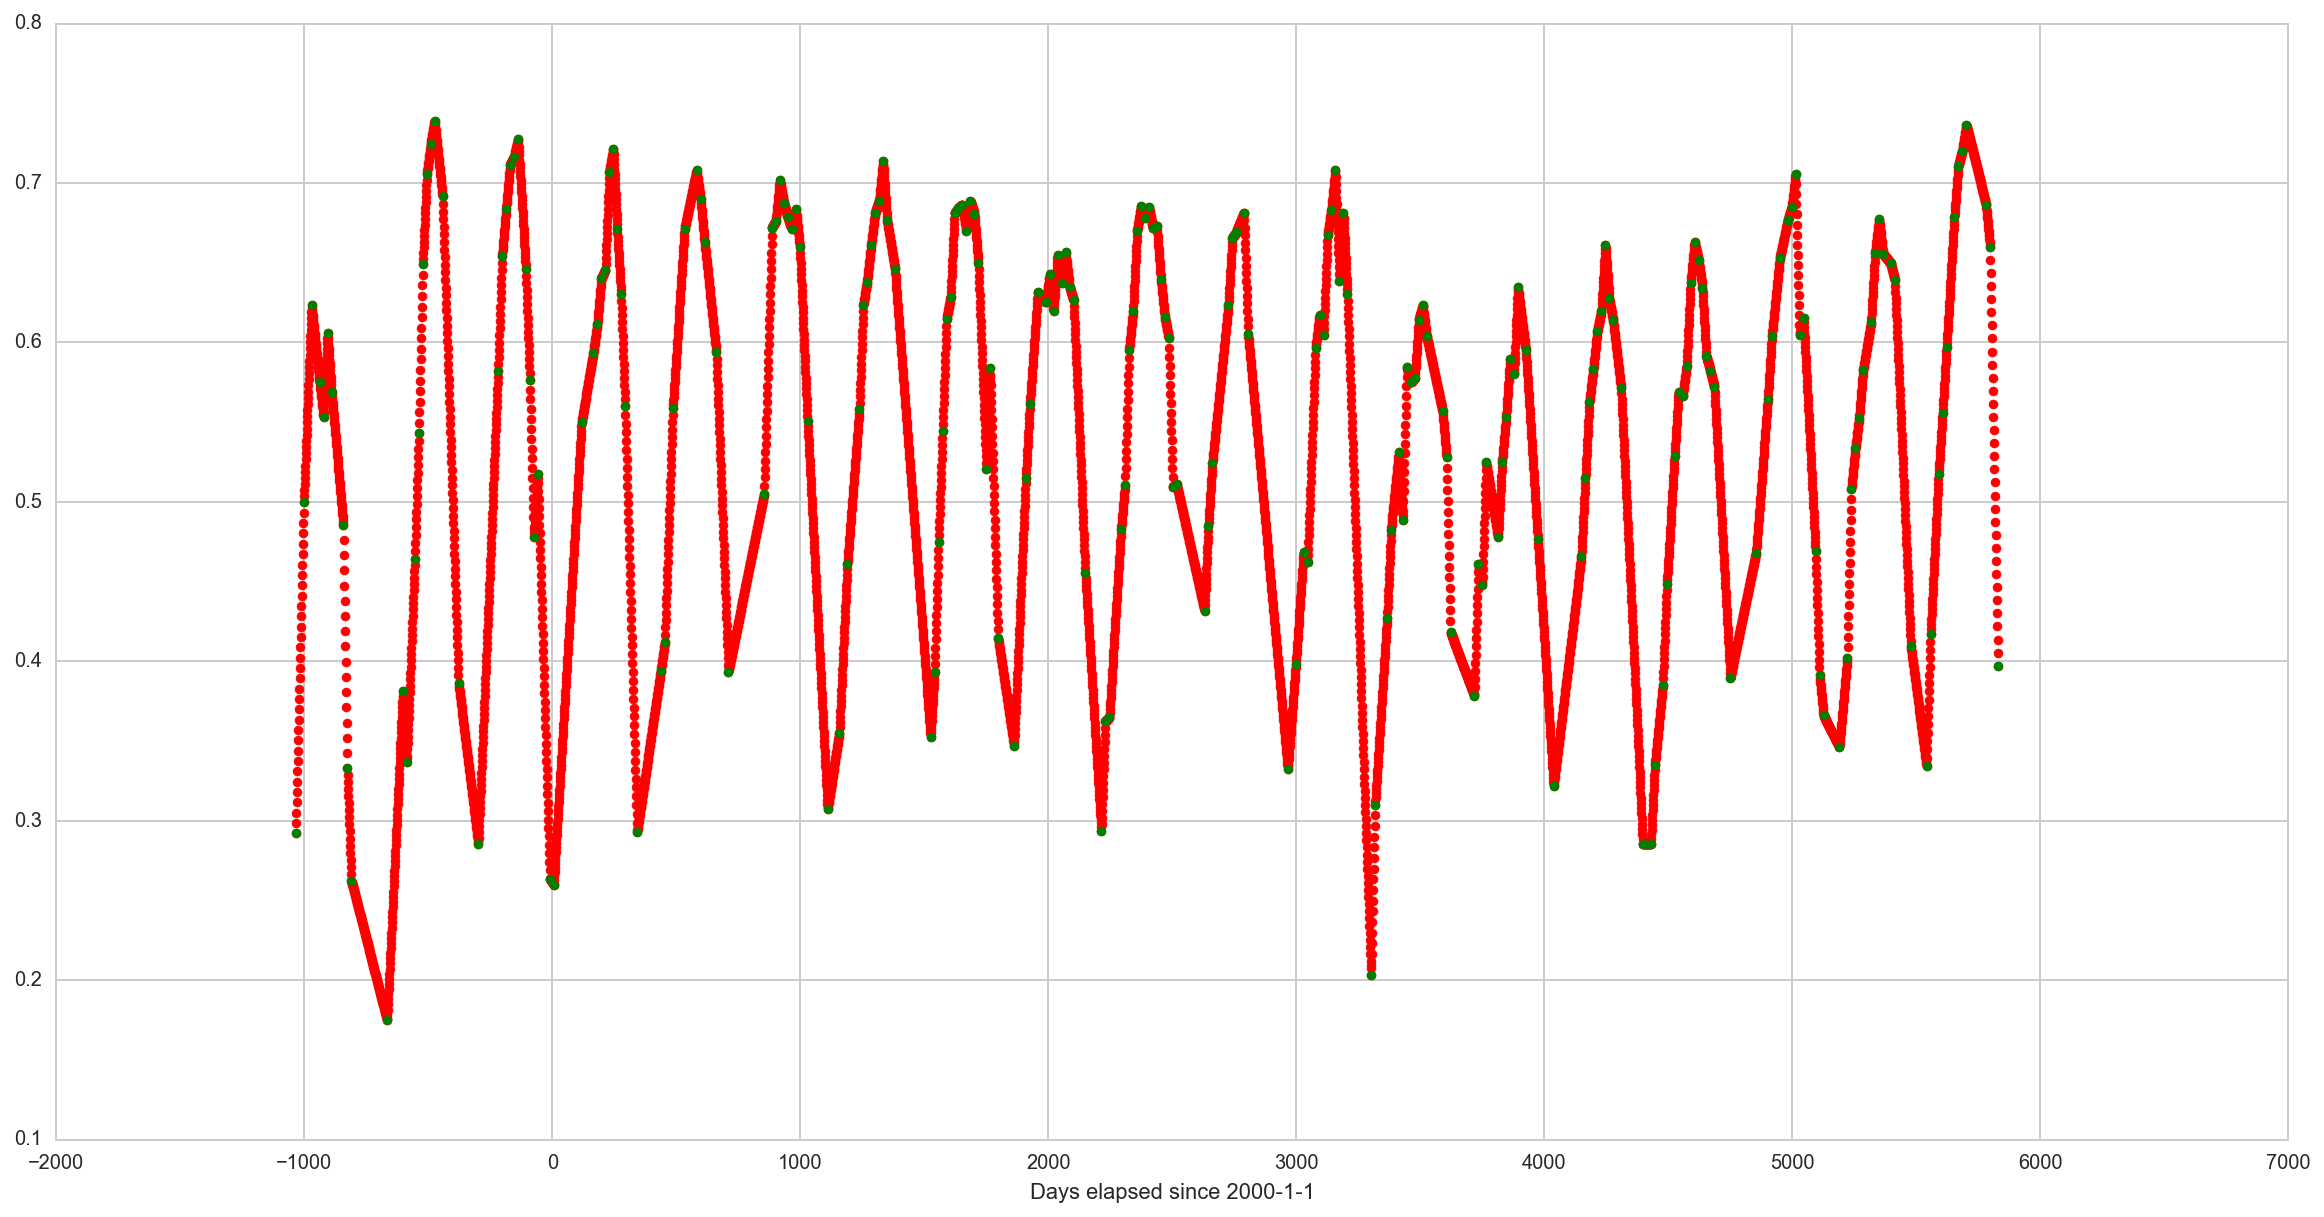

In [13]:
plt.scatter(df_srvi_interpolated["days_elapsed"], df_srvi_interpolated["wp_ndvi"], color="red")
plt.scatter(df_srvi["days_elapsed"], df_srvi["wp_ndvi"], color="green")
plt.xlabel("Days elapsed since 2000-1-1")
plt.show()

### MODIS 1km 8-day Land Surface Temperature & Emissivity

In [14]:
df_lste = utils.process_modis_lst_emissivity(WESTPOND_LST_EM, prefix="wp", interpolate_missing=False)
df_lste["days_elapsed"] = utils.create_days_elapsed_series(df_lste["year"], df_lste["doy"])
df_lste.head()

Processing ../data/MODIS/2016-04-20-US-Tw1-MOD11A2.csv...


,year,doy,wp_LST.day,wp_LST.night,days_elapsed
0,2001,4,14.21,-0.21,369
1,2001,12,11.25,NaN,377
2,2001,20,14.57,-0.61,385
3,2001,28,12.11,0.89,393
4,2001,36,15.23,2.97,401


In [15]:
df_lste_interpolated = utils.process_modis_lst_emissivity(WESTPOND_LST_EM, prefix="wp", interpolate_missing=True)
df_lste_interpolated["days_elapsed"] = utils.create_days_elapsed_series(df_lste_interpolated["year"], df_lste_interpolated["doy"])
df_lste_interpolated.head()

Processing ../data/MODIS/2016-04-20-US-Tw1-MOD11A2.csv...


,doy,wp_LST.day,wp_LST.night,year,days_elapsed
0,4,14.210000,-0.210000,2001,369
1,5,13.644185,-0.399740,2001,370
2,6,13.398107,-0.384504,2001,371
3,7,13.176305,-0.365927,2001,372
4,8,12.978777,-0.344007,2001,373


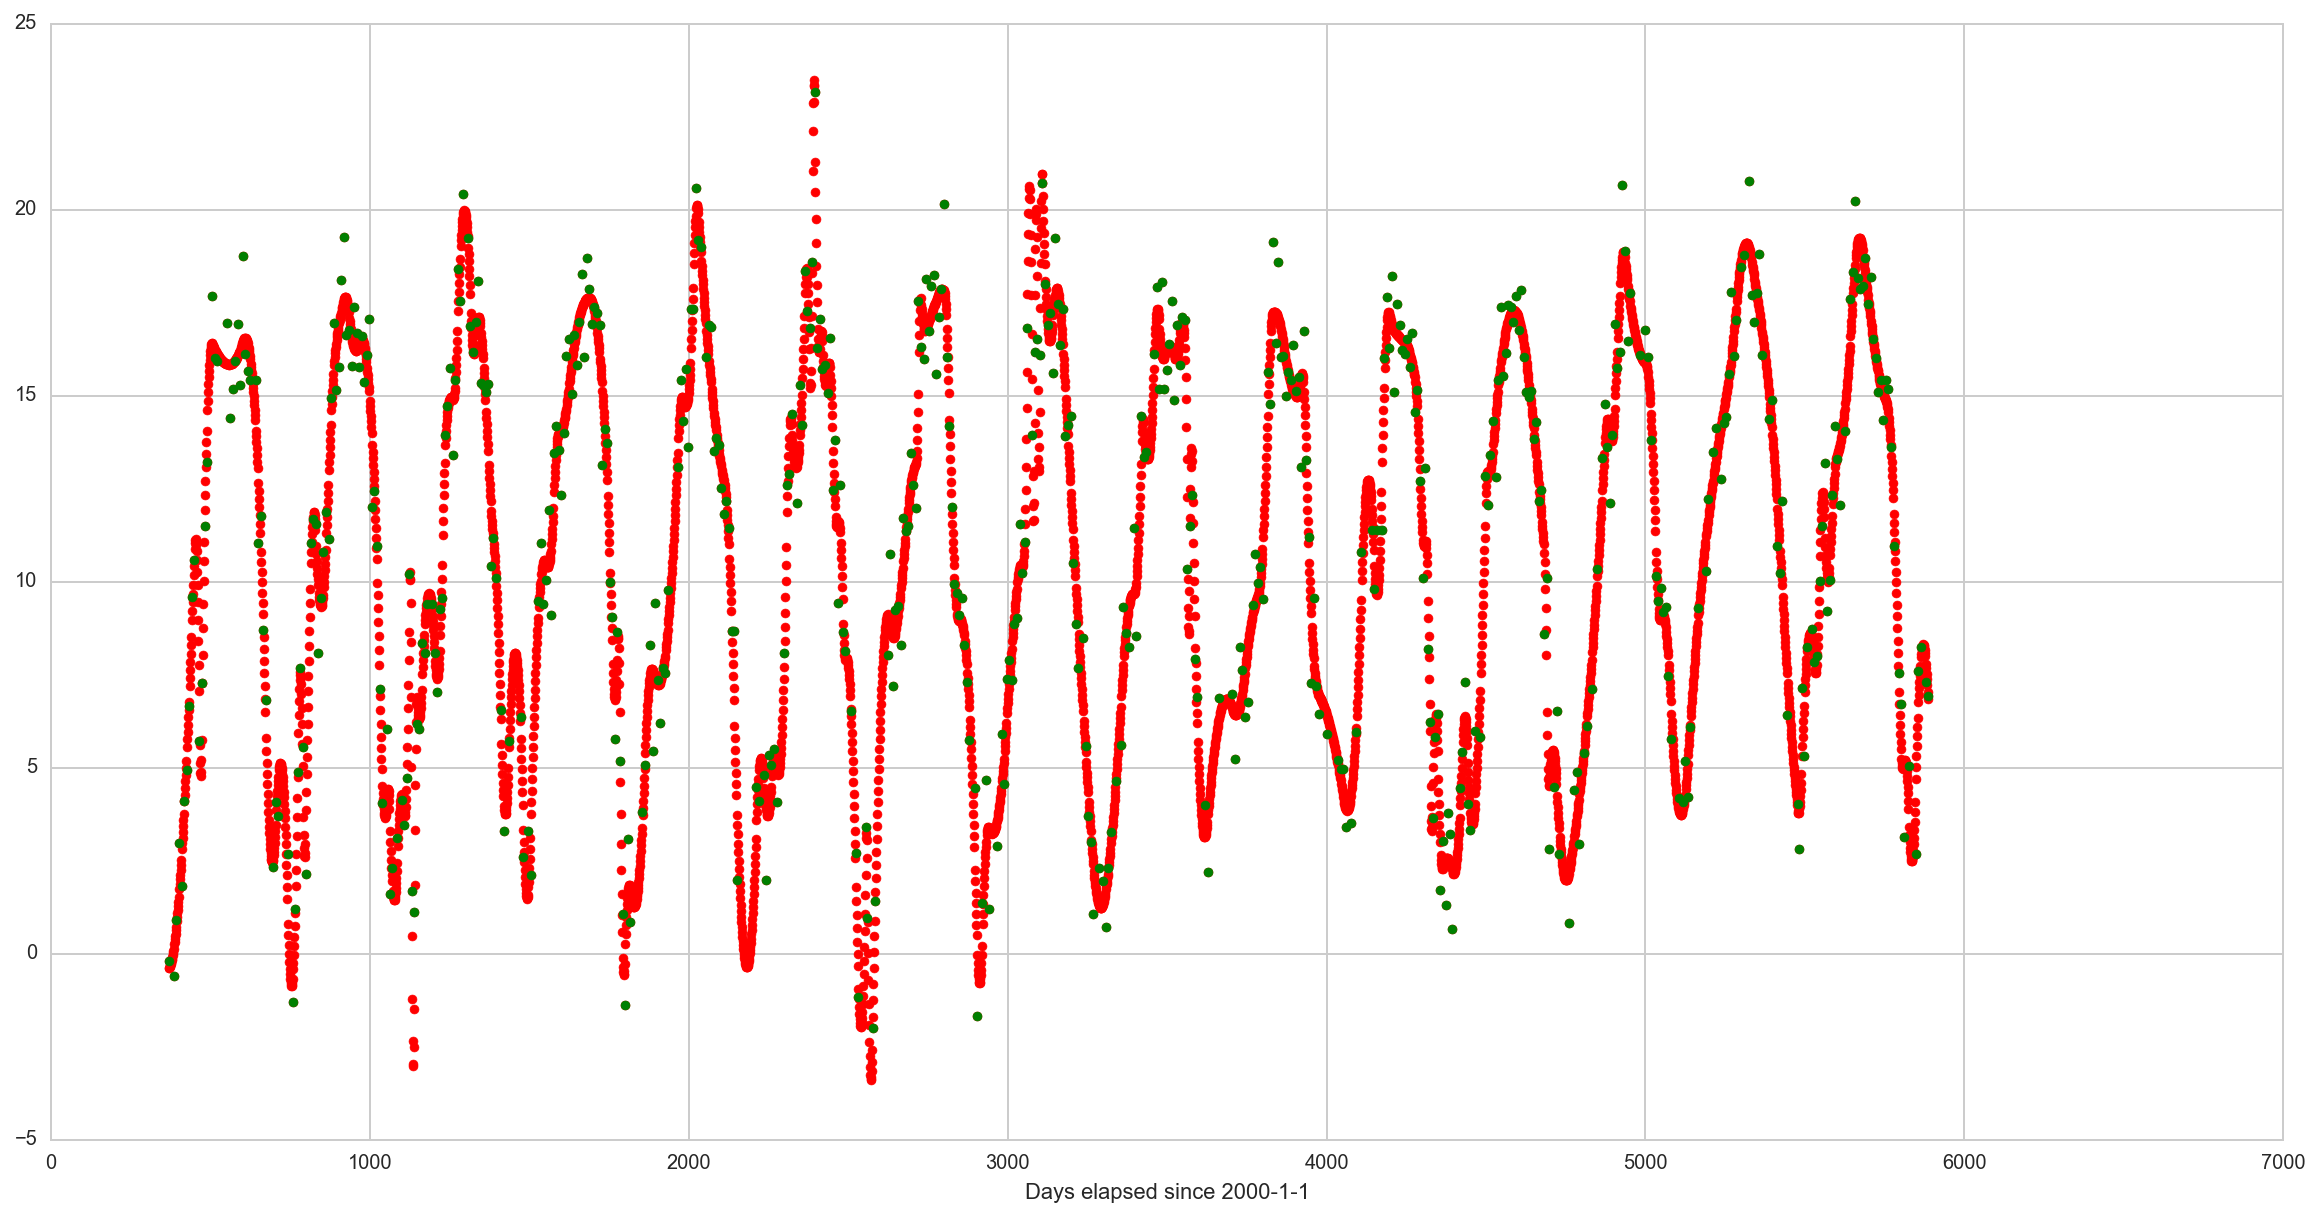

In [16]:
plt.scatter(df_lste_interpolated["days_elapsed"], df_lste_interpolated["wp_LST.night"], color="red")
plt.scatter(df_lste["days_elapsed"], df_lste["wp_LST.night"], color="green")
plt.xlabel("Days elapsed since 2000-1-1")
plt.show()

### Eddy Covariance Data

In [17]:
eddy = utils.process_tower(WESTPOND_DATAFILE, prefix="wp", interpolate_missing=False)
eddy["days_elapsed"] = utils.create_days_elapsed_series(eddy["year"], eddy["doy"])
eddy.head()

Processing ../data/WP_2012195to2015126_L3.mat...


,year,doy,wp_RNET,wp_ch4_gf,wp_co2_gf,wp_er,wp_gpp,wp_h,wp_le,days_elapsed
0,2012,195,20.798342,935.791630,-65.781109,31.335633,-97.116742,2.605590,13.643902,4577
1,2012,196,20.573593,1146.073702,-72.500139,32.460193,-104.960332,3.459300,13.498761,4578
2,2012,197,20.475931,1342.520338,-67.640609,34.194316,-101.834924,2.117474,14.987823,4579
3,2012,198,20.571045,1539.940321,-73.418414,33.169321,-106.587735,4.636145,11.355851,4580
4,2012,199,16.757401,1527.286012,-69.070658,31.115552,-100.186209,3.448946,10.943102,4581


In [18]:
eddy_interpolated = utils.process_tower(WESTPOND_DATAFILE, prefix="wp", interpolate_missing=True)
eddy_interpolated["days_elapsed"] = utils.create_days_elapsed_series(eddy_interpolated["year"], eddy_interpolated["doy"])
eddy_interpolated.head()

Processing ../data/WP_2012195to2015126_L3.mat...


,year,doy,wp_RNET,wp_ch4_gf,wp_co2_gf,wp_er,wp_gpp,wp_h,wp_le,days_elapsed
0,2012,195,20.798342,935.791630,-65.781109,31.335633,-97.116742,2.605590,13.643902,4577
1,2012,196,20.573593,1146.073702,-72.500139,32.460193,-104.960332,3.459300,13.498761,4578
2,2012,197,20.475931,1342.520338,-67.640609,34.194316,-101.834924,2.117474,14.987823,4579
3,2012,198,20.571045,1539.940321,-73.418414,33.169321,-106.587735,4.636145,11.355851,4580
4,2012,199,16.757401,1527.286012,-69.070658,31.115552,-100.186209,3.448946,10.943102,4581


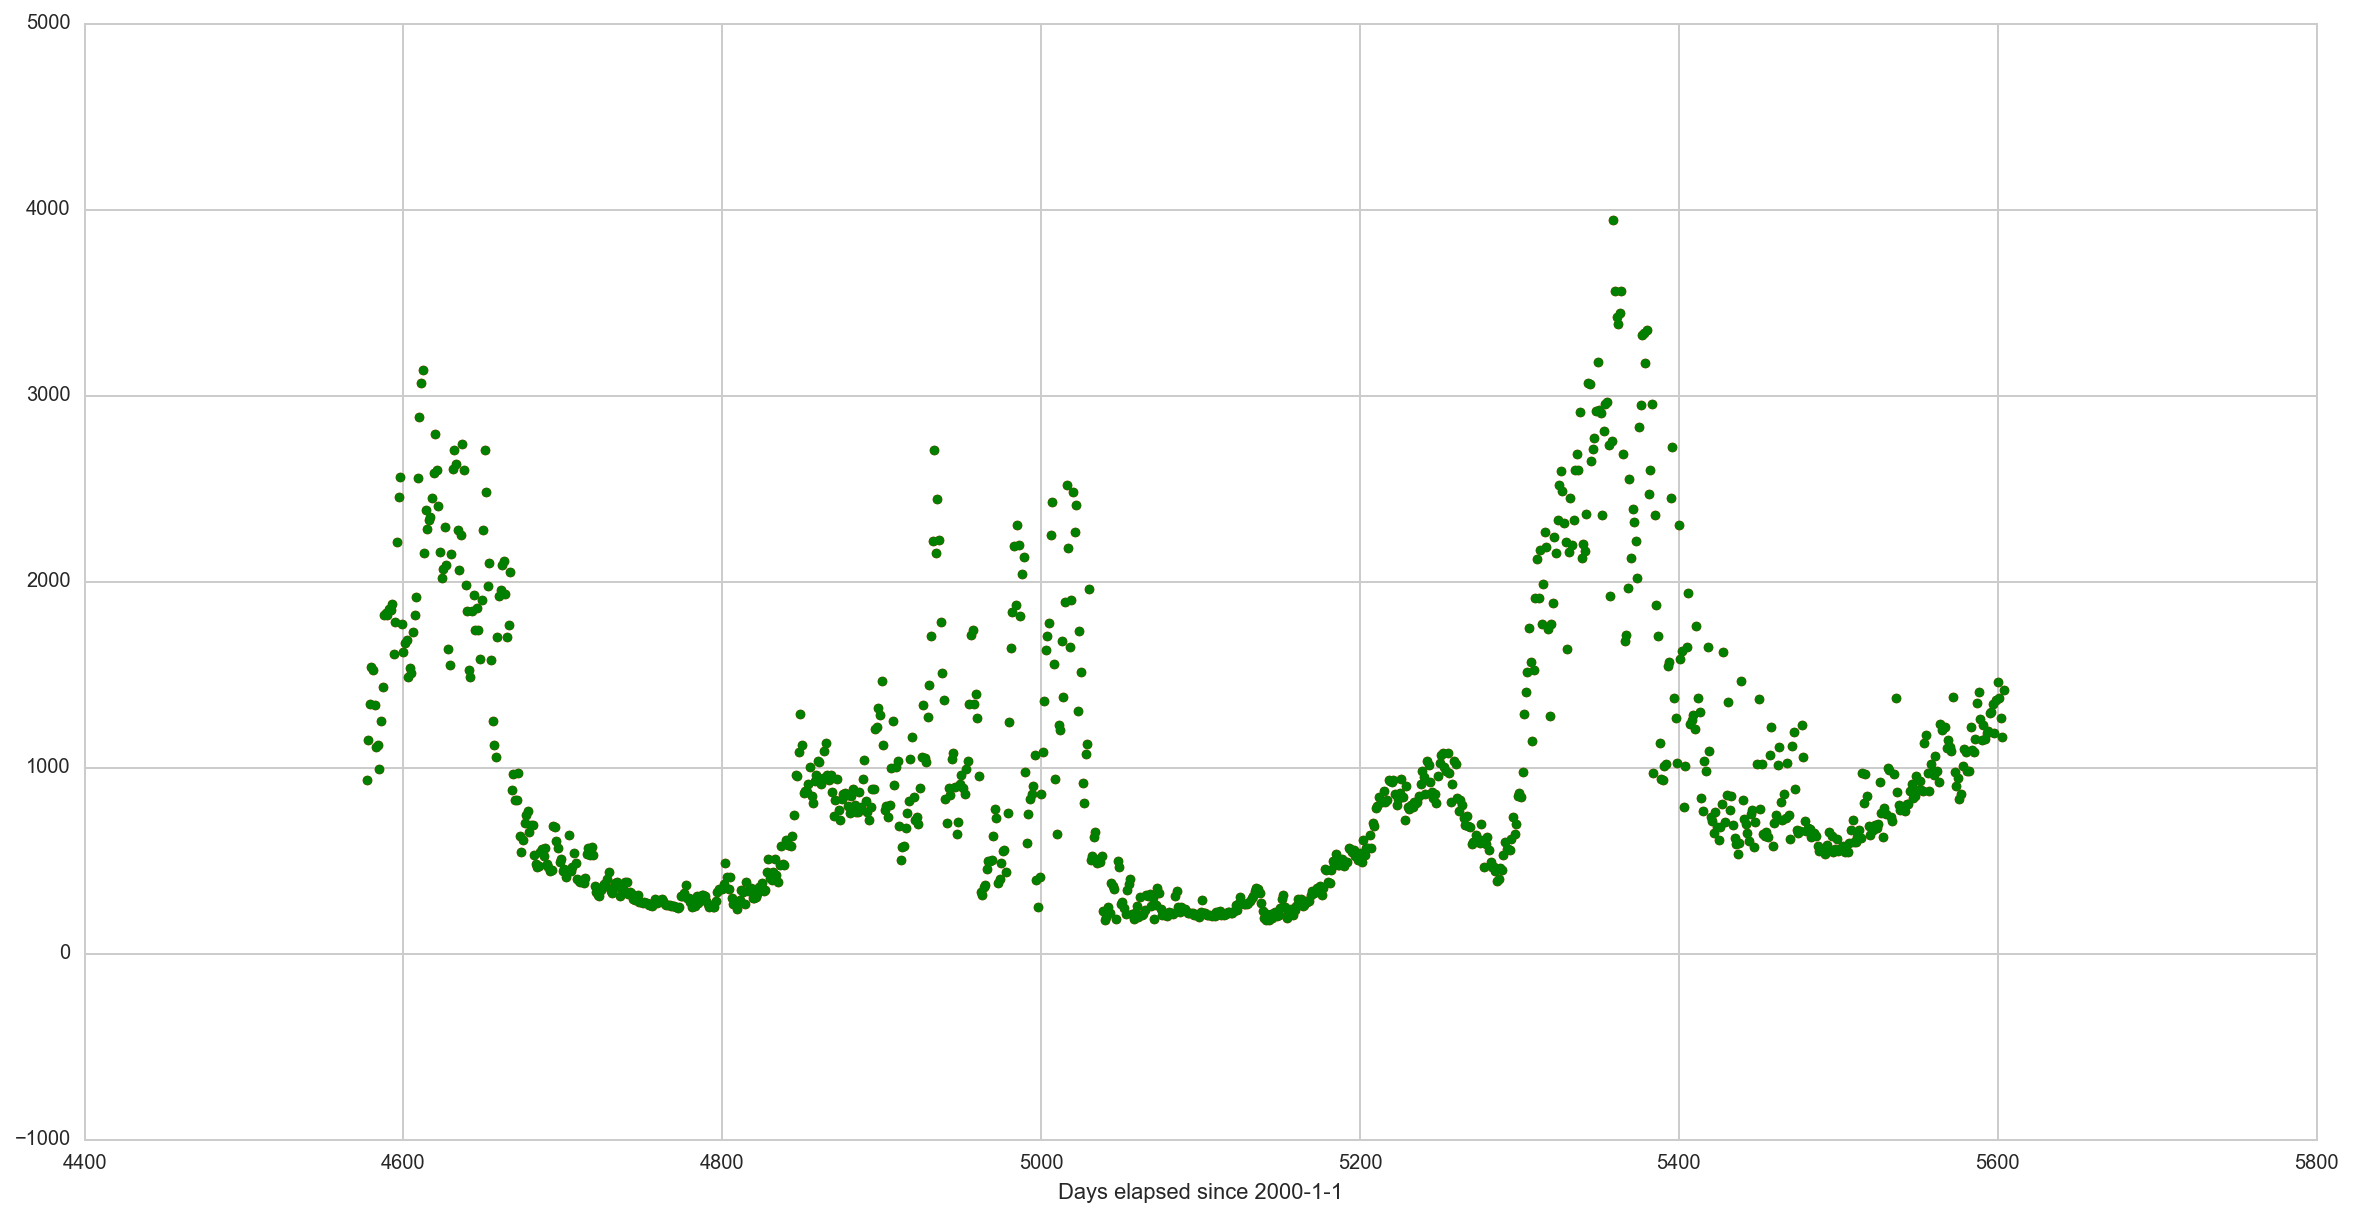

In [19]:
plt.scatter(eddy_interpolated["days_elapsed"], eddy_interpolated["wp_ch4_gf"], color="red")
plt.scatter(eddy["days_elapsed"], eddy["wp_ch4_gf"], color="green")
plt.xlabel("Days elapsed since 2000-1-1")
plt.show()

### TOWER LWI

In [20]:
tower_lwi = utils.process_tower_lwi(TOWER_LWI, interpolate_missing=False)
tower_lwi["days_elapsed"] = utils.create_days_elapsed_series(tower_lwi["year"], tower_lwi["doy"])
tower_lwi.head()

Processing ../data/Tower-data/2016-04-14_daily_TOWER_LW.csv...


,year,doy,LW_IN.wp,LW_IN.si,LW_IN,days_elapsed
0,2010,1,NaN,NaN,NaN,3653
1,2010,2,NaN,NaN,NaN,3654
2,2010,3,NaN,NaN,NaN,3655
3,2010,4,NaN,NaN,NaN,3656
4,2010,5,NaN,NaN,NaN,3657


In [21]:
tower_lwi_interpolated = utils.process_tower_lwi(TOWER_LWI, interpolate_missing=True)
tower_lwi_interpolated["days_elapsed"] = utils.create_days_elapsed_series(tower_lwi_interpolated["year"], tower_lwi_interpolated["doy"])
tower_lwi_interpolated.head()

Processing ../data/Tower-data/2016-04-14_daily_TOWER_LW.csv...


,year,doy,LW_IN.wp,LW_IN.si,LW_IN,days_elapsed
0,2010,1,NaN,NaN,NaN,3653
1,2010,2,NaN,NaN,NaN,3654
2,2010,3,NaN,NaN,NaN,3655
3,2010,4,NaN,NaN,NaN,3656
4,2010,5,NaN,NaN,NaN,3657


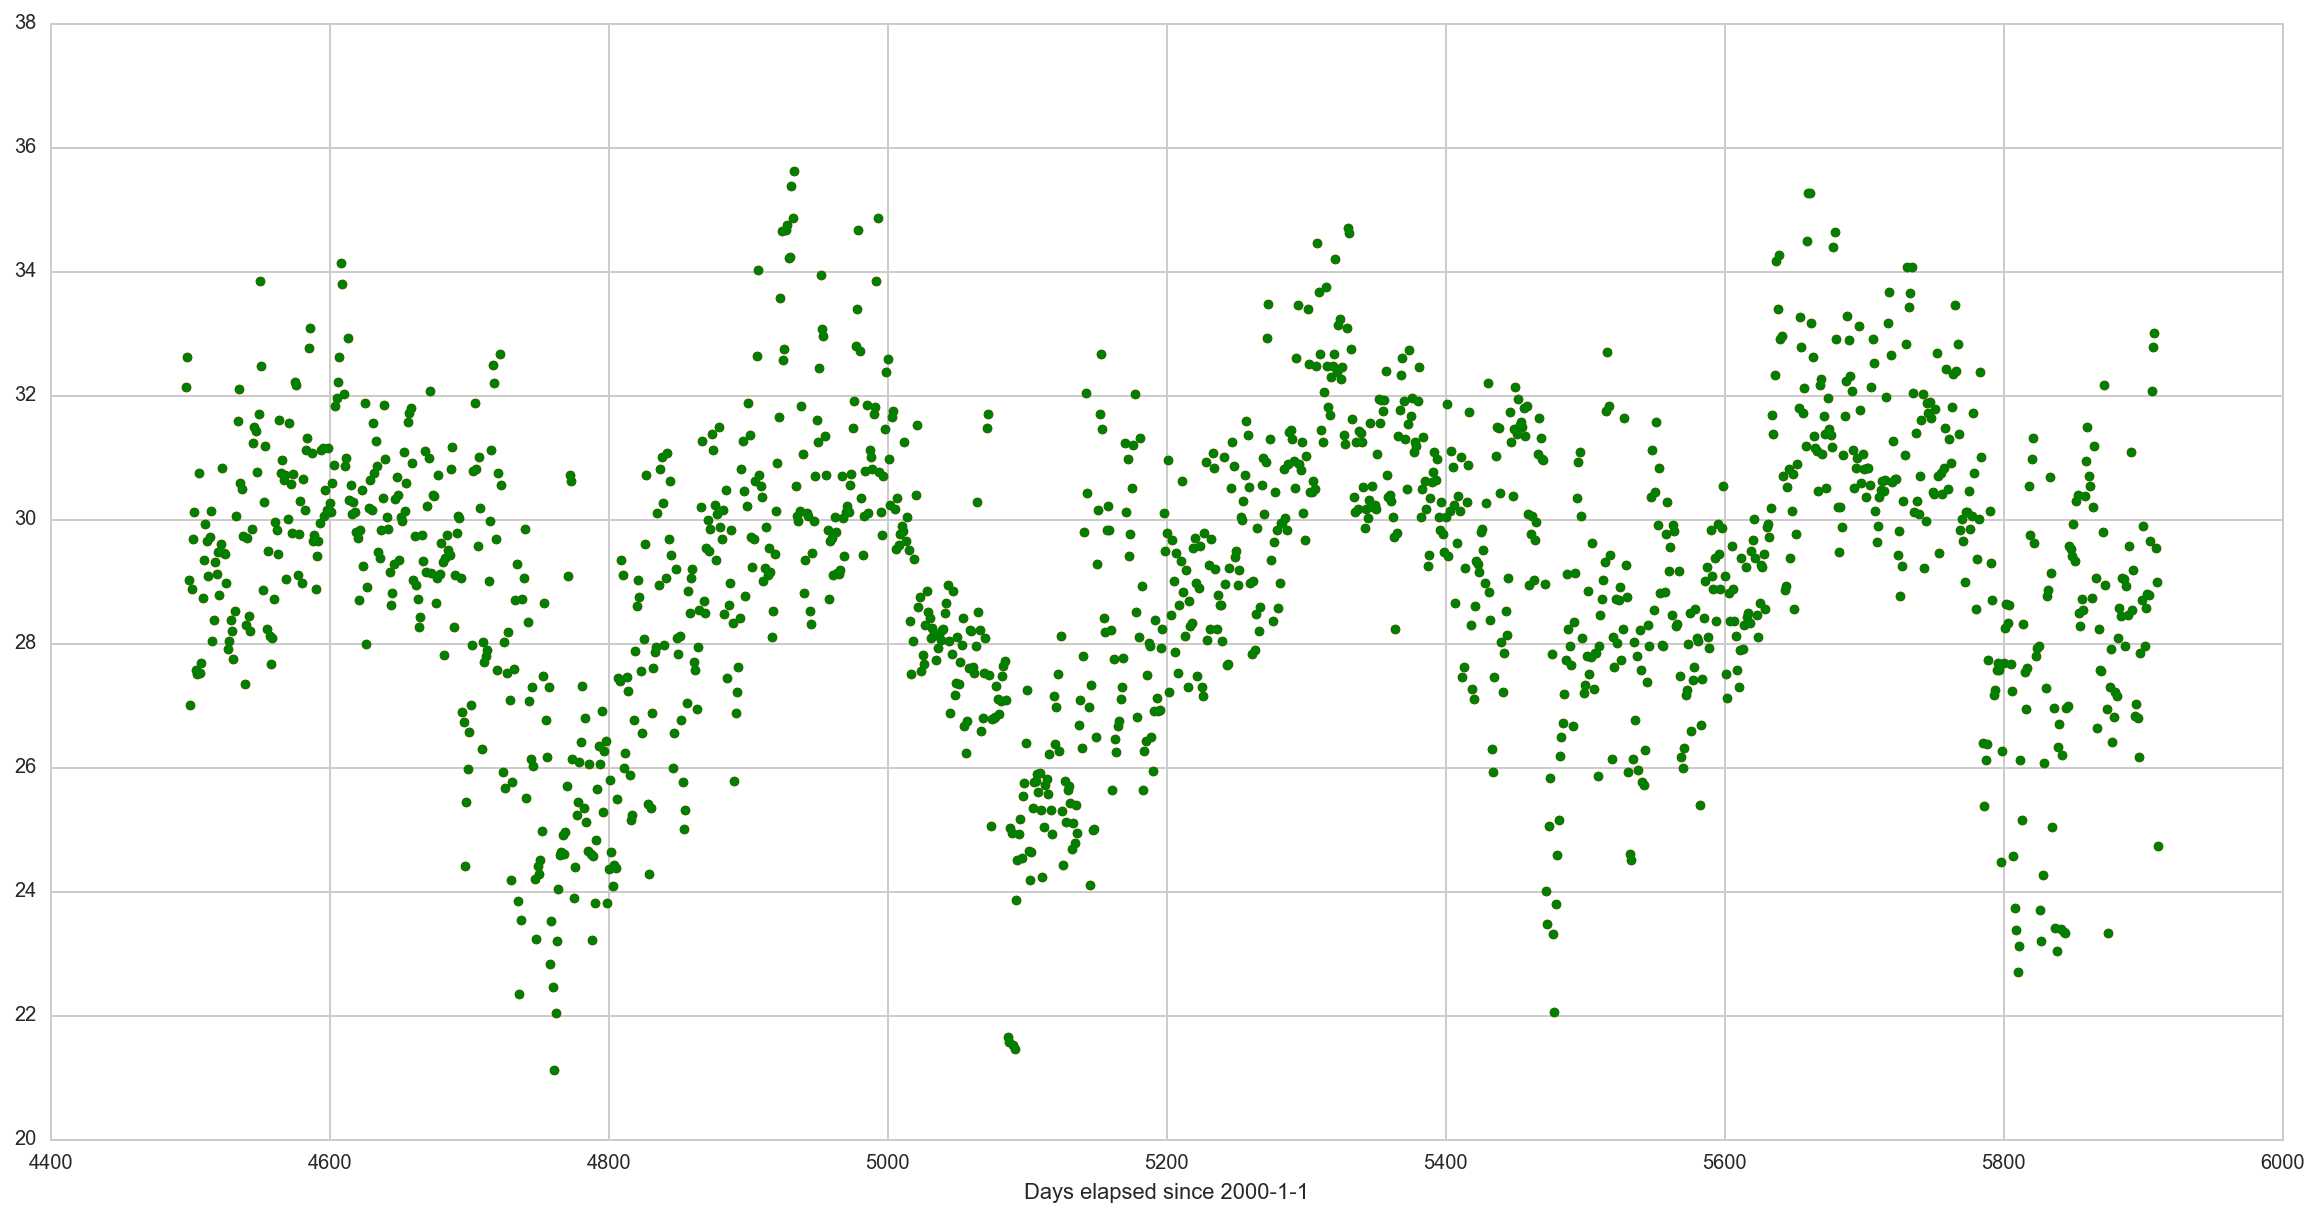

In [22]:
plt.scatter(tower_lwi_interpolated["days_elapsed"], tower_lwi_interpolated["LW_IN.wp"], color="red")
plt.scatter(tower_lwi["days_elapsed"], tower_lwi["LW_IN.wp"], color="green")
plt.xlabel("Days elapsed since 2000-1-1")
plt.show()